In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2023-03-27 16:41:09.430844: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Reading the Malaria Dataset

In [2]:
malaria_df = pd.read_excel('./MALARIA-CHENGALPET.xlsx',sheet_name = 'Sheet6')
malaria_df.head(10)

,MONTH,WEEK,HUMIDITY (%),MOSQUITO,SPECIES,MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE
0,January,1,78.9,Pv,imported,True,False,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2
1,January,2,78.9,Pv,indigenious,False,True,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0
2,January,3,78.9,Pf,indigenious,False,False,False,True,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0
3,January,4,78.9,Pf,imported,False,False,True,False,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3
4,February,1,76.3,Pv,imported,True,False,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0
5,February,2,76.3,Pv,indigenious,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1
6,February,3,76.3,Pf,indigenious,False,False,False,True,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0
7,February,4,76.3,Pv,indigenious,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0
8,March,1,73.9,Pv,indigenious,False,True,False,False,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0
9,March,2,73.9,Pf,imported,False,False,True,False,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0


### Converting Categorical Values to Numerical Values

In [3]:
#First Converting the target column
mosquito = pd.get_dummies(malaria_df['MOSQUITO'],drop_first=True)
malaria_df.drop('MOSQUITO',axis=1,inplace=True)
malaria_df=pd.concat([malaria_df,mosquito],axis=1)
malaria_df.head(10)

#Pv = 1 and Pf = 0 

,MONTH,WEEK,HUMIDITY (%),SPECIES,MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,January,1,78.9,imported,True,False,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,January,2,78.9,indigenious,False,True,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,January,3,78.9,indigenious,False,False,False,True,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,January,4,78.9,imported,False,False,True,False,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,February,1,76.3,imported,True,False,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,February,2,76.3,indigenious,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,February,3,76.3,indigenious,False,False,False,True,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,February,4,76.3,indigenious,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,March,1,73.9,indigenious,False,True,False,False,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,March,2,73.9,imported,False,False,True,False,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [4]:
species = pd.get_dummies(malaria_df['SPECIES'],drop_first=True)
malaria_df.drop('SPECIES',axis=1,inplace=True)
malaria_df=pd.concat([malaria_df,species],axis=1)
malaria_df.head(10)
#Converting the categorical values under species column into binary (Indigenious = 1 and Imported = 0)

,MONTH,WEEK,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv,indigenious
0,January,1,78.9,True,False,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1,0
1,January,2,78.9,False,True,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1,1
2,January,3,78.9,False,False,False,True,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0,1
3,January,4,78.9,False,False,True,False,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0,0
4,February,1,76.3,True,False,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1,0
5,February,2,76.3,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1,1
6,February,3,76.3,False,False,False,True,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0,1
7,February,4,76.3,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1,1
8,March,1,73.9,False,True,False,False,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1,1
9,March,2,73.9,False,False,True,False,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0,0


In [5]:
malaria_df['MOSQUITO1'] = malaria_df['MOSQUITO1'].astype(int)
malaria_df['MOSQUITO2'] = malaria_df['MOSQUITO2'].astype(int)
malaria_df['MOSQUITO3'] = malaria_df['MOSQUITO3'].astype(int)
malaria_df['MOSQUITO4'] = malaria_df['MOSQUITO4'].astype(int)
malaria_df.head(10)

,MONTH,WEEK,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv,indigenious
0,January,1,78.9,1,0,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1,0
1,January,2,78.9,0,1,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1,1
2,January,3,78.9,0,0,0,1,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0,1
3,January,4,78.9,0,0,1,0,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0,0
4,February,1,76.3,1,0,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1,0
5,February,2,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1,1
6,February,3,76.3,0,0,0,1,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0,1
7,February,4,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1,1
8,March,1,73.9,0,1,0,0,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1,1
9,March,2,73.9,0,0,1,0,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0,0


#### Splitting the Dataset into X and y

In [6]:
X = malaria_df.drop(['indigenious','MONTH','WEEK'],axis=1)
X.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,78.9,1,0,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,78.9,0,1,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,78.9,0,0,0,1,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,78.9,0,0,1,0,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,76.3,1,0,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,76.3,0,0,0,1,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,73.9,0,1,0,0,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,73.9,0,0,1,0,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [7]:
y=malaria_df['indigenious']
y.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    0
Name: indigenious, dtype: uint8

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [9]:
X_train.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,0,1,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,0,1,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,0,0,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,0,1,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,0,0,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
286,80.0,0,1,0,0,87.23,79.73,73.26,72.62,285.72,6,4.43,3,4,1,1
574,80.3,0,0,0,1,87.74,80.39,74.58,73.28,50.10,1,5.04,3,2,1,0
380,76.0,0,0,1,0,86.94,79.80,71.10,71.23,42.20,2,5.90,2,7,1,0
497,67.9,0,0,1,0,99.65,90.72,84.03,78.10,0.00,0,8.45,5,0,0,0
526,80.3,0,0,0,1,86.61,80.19,74.77,73.17,312.40,8,5.86,3,7,1,0


In [10]:
y_train.head(10)

423    1
328    1
116    1
395    1
564    0
286    1
574    1
380    0
497    0
526    1
Name: indigenious, dtype: uint8

### Implementing Decision Tree

In [11]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
dtree_predictions = dtree.predict(X_test)
dtree_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [15]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,dtree_predictions)
score

1.0

In [16]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,dtree_predictions))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        60

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



Text(0.5, 1.0, 'Accuracy Score: 1.0')

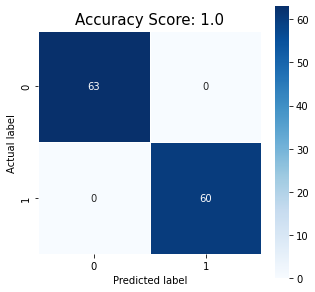

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,dtree_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

[Text(0.6, 0.8333333333333334, 'MOSQUITO2 <= 0.5\ngini = 0.5\nsamples = 489\nvalue = [240, 249]\nclass = Pf'),
 Text(0.4, 0.5, 'MOSQUITO4 <= 0.5\ngini = 0.439\nsamples = 356\nvalue = [240, 116]\nclass = Pv'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 240\nvalue = [240, 0]\nclass = Pv'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 116\nvalue = [0, 116]\nclass = Pf'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 133\nvalue = [0, 133]\nclass = Pf')]

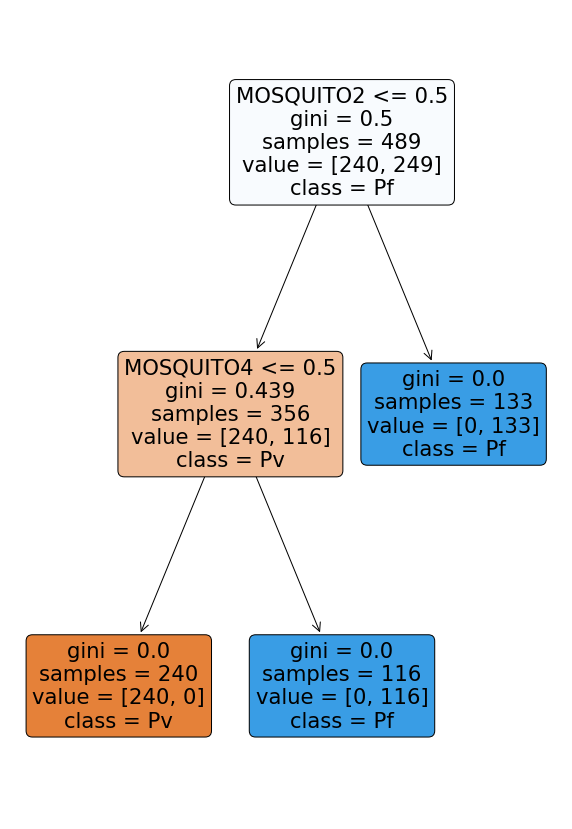

In [22]:
plt.figure(figsize=(10,15))
tree.plot_tree(decision_tree=dtree, feature_names = X.columns, class_names =["Pv","Pf"] , filled = True, rounded = True)

##### Therefore, we can see that the Decision Tree has been able to classify the data with a 100% Accuracy

### Implementing Different Ensemble Method

#### A. Majority Voting Implementation

In [23]:
X = malaria_df.drop(['indigenious','MONTH','WEEK'],axis=1)
X.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,78.9,1,0,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,78.9,0,1,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,78.9,0,0,0,1,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,78.9,0,0,1,0,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,76.3,1,0,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,76.3,0,0,0,1,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,73.9,0,1,0,0,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,73.9,0,0,1,0,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [24]:
y=malaria_df['indigenious']
y.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    0
Name: indigenious, dtype: uint8

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [26]:
X_train.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,0,1,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,0,1,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,0,0,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,0,1,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,0,0,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
286,80.0,0,1,0,0,87.23,79.73,73.26,72.62,285.72,6,4.43,3,4,1,1
574,80.3,0,0,0,1,87.74,80.39,74.58,73.28,50.10,1,5.04,3,2,1,0
380,76.0,0,0,1,0,86.94,79.80,71.10,71.23,42.20,2,5.90,2,7,1,0
497,67.9,0,0,1,0,99.65,90.72,84.03,78.10,0.00,0,8.45,5,0,0,0
526,80.3,0,0,0,1,86.61,80.19,74.77,73.17,312.40,8,5.86,3,7,1,0


In [27]:
y_train.head(10)

423    1
328    1
116    1
395    1
564    0
286    1
574    1
380    0
497    0
526    1
Name: indigenious, dtype: uint8

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = DecisionTreeClassifier(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1,max_depth=1)
clf3 = DecisionTreeClassifier(random_state=1,max_depth=3)
main_clf = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], weights=[1,1,1])

In [29]:
labels = ['Classifier 1','Classifier 2','Classifier 3']
for clf,label in zip([clf1,clf2,clf3],labels):
    clf.fit(X_train,y_train)
    print("Validation Accuracy: %0.2f [%s]" % (clf.score(X_test,y_test),label))

Validation Accuracy: 1.00 [Classifier 1]
Validation Accuracy: 0.76 [Classifier 2]
Validation Accuracy: 1.00 [Classifier 3]


In [30]:
main_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('clf1', DecisionTreeClassifier(random_state=1)),
                             ('clf2',
                              DecisionTreeClassifier(max_depth=1,
                                                     random_state=1)),
                             ('clf3',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=1))],
                 weights=[1, 1, 1])

In [32]:
majorityVoting_predictions = main_clf.predict(X_test)
majorityVoting_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [33]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,majorityVoting_predictions)
score

1.0

In [35]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_test, majorityVoting_predictions, pos_label=1)
precision_negative = precision_score(y_test, majorityVoting_predictions, pos_label=0)
precision_positive, precision_negative 

(1.0, 1.0)

In [37]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,majorityVoting_predictions))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        60

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



Text(0.5, 1.0, 'Accuracy Score: 1.0')

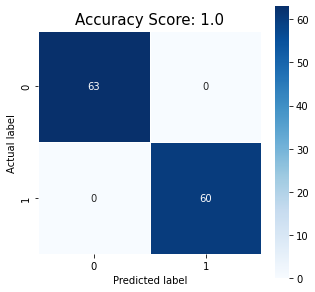

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,majorityVoting_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(main_clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

##### Therefore, we have seen that Majority Voting predicts the classifiers with a 100% Accuracy

#### B. Bagging Implementation

In [39]:
X = malaria_df.drop(['indigenious','MONTH','WEEK'],axis=1)
X.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,78.9,1,0,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,78.9,0,1,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,78.9,0,0,0,1,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,78.9,0,0,1,0,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,76.3,1,0,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,76.3,0,0,0,1,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,73.9,0,1,0,0,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,73.9,0,0,1,0,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [40]:
y=malaria_df['indigenious']
y.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    0
Name: indigenious, dtype: uint8

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [42]:
X_train.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,0,1,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,0,1,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,0,0,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,0,1,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,0,0,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
286,80.0,0,1,0,0,87.23,79.73,73.26,72.62,285.72,6,4.43,3,4,1,1
574,80.3,0,0,0,1,87.74,80.39,74.58,73.28,50.10,1,5.04,3,2,1,0
380,76.0,0,0,1,0,86.94,79.80,71.10,71.23,42.20,2,5.90,2,7,1,0
497,67.9,0,0,1,0,99.65,90.72,84.03,78.10,0.00,0,8.45,5,0,0,0
526,80.3,0,0,0,1,86.61,80.19,74.77,73.17,312.40,8,5.86,3,7,1,0


In [43]:
y_train.head(10)

423    1
328    1
116    1
395    1
564    0
286    1
574    1
380    0
497    0
526    1
Name: indigenious, dtype: uint8

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=None)

>10 1.000 (0.000)
>50 1.000 (0.000)
>100 1.000 (0.000)
>500 1.000 (0.000)
>1000 1.000 (0.000)
>5000 1.000 (0.000)


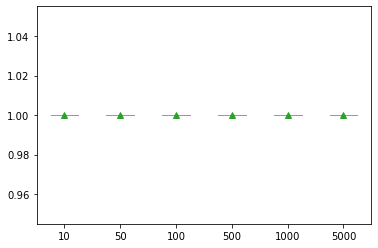

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = BaggingClassifier(base_estimator=tree,n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

We can see from the given boxplot that we can take the n_estimators as 500 (Since it gives the highest accuracy and is neother the most minimum or maximum number of tress that are used for classification)

In [48]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=10)

In [49]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=10),
                  n_estimators=500, n_jobs=1, oob_score=True, random_state=10)

In [50]:
bag_predictions = bag.predict(X_test)
bag_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [51]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,bag_predictions)
score

1.0

In [52]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_test, bag_predictions, pos_label=1)
precision_negative = precision_score(y_test, bag_predictions, pos_label=0)
precision_positive, precision_negative 

(1.0, 1.0)

In [54]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,bag_predictions))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        60

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



Text(0.5, 1.0, 'Accuracy Score: 1.0')

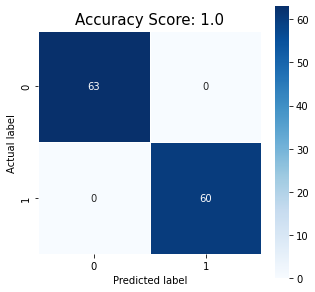

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,bag_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(bag.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

##### Therefore, we can see from the above Bagging implementation that the maximum Accuracy we have got is 100%

#### C. Boosting Implementation

In [56]:
X = malaria_df.drop(['indigenious','MONTH','WEEK'],axis=1)
X.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,78.9,1,0,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,78.9,0,1,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,78.9,0,0,0,1,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,78.9,0,0,1,0,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,76.3,1,0,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,76.3,0,0,0,1,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,73.9,0,1,0,0,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,73.9,0,0,1,0,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [57]:
y=malaria_df['indigenious']
y.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    0
Name: indigenious, dtype: uint8

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [59]:
X_train.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,0,1,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,0,1,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,0,0,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,0,1,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,0,0,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
286,80.0,0,1,0,0,87.23,79.73,73.26,72.62,285.72,6,4.43,3,4,1,1
574,80.3,0,0,0,1,87.74,80.39,74.58,73.28,50.10,1,5.04,3,2,1,0
380,76.0,0,0,1,0,86.94,79.80,71.10,71.23,42.20,2,5.90,2,7,1,0
497,67.9,0,0,1,0,99.65,90.72,84.03,78.10,0.00,0,8.45,5,0,0,0
526,80.3,0,0,0,1,86.61,80.19,74.77,73.17,312.40,8,5.86,3,7,1,0


In [60]:
y_train.head(10)

423    1
328    1
116    1
395    1
564    0
286    1
574    1
380    0
497    0
526    1
Name: indigenious, dtype: uint8

In [61]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=None)

In [62]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(base_estimator=tree,
                        n_estimators=500,
                        algorithm='SAMME',
                        #n_jobs=1,
                        random_state=10)

In [63]:
boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         random_state=10),
                   n_estimators=500, random_state=10)

In [64]:
boost_predictions = boost.predict(X_test)
boost_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [65]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,boost_predictions)
score

1.0

In [66]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_test, boost_predictions, pos_label=1)
precision_negative = precision_score(y_test, boost_predictions, pos_label=0)
precision_positive, precision_negative 

(1.0, 1.0)

In [68]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,boost_predictions))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        60

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



Text(0.5, 1.0, 'Accuracy Score: 1.0')

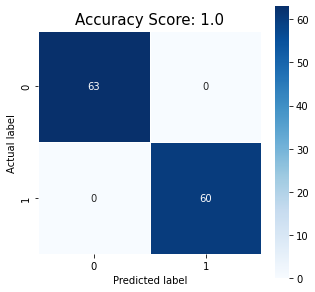

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,boost_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(boost.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

##### Therefore, we can see that the Boosting Classifier has been able to predict with a 100% Accuracy

#### D. Gradient Boosting Implementation

In [70]:
X = malaria_df.drop(['indigenious','MONTH','WEEK'],axis=1)
X.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,78.9,1,0,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,78.9,0,1,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,78.9,0,0,0,1,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,78.9,0,0,1,0,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,76.3,1,0,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,76.3,0,0,0,1,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,73.9,0,1,0,0,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,73.9,0,0,1,0,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [71]:
y=malaria_df['indigenious']
y.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    0
Name: indigenious, dtype: uint8

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [74]:
X_train.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,0,1,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,0,1,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,0,0,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,0,1,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,0,0,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
286,80.0,0,1,0,0,87.23,79.73,73.26,72.62,285.72,6,4.43,3,4,1,1
574,80.3,0,0,0,1,87.74,80.39,74.58,73.28,50.10,1,5.04,3,2,1,0
380,76.0,0,0,1,0,86.94,79.80,71.10,71.23,42.20,2,5.90,2,7,1,0
497,67.9,0,0,1,0,99.65,90.72,84.03,78.10,0.00,0,8.45,5,0,0,0
526,80.3,0,0,0,1,86.61,80.19,74.77,73.17,312.40,8,5.86,3,7,1,0


In [75]:
y_train.head(10)

423    1
328    1
116    1
395    1
564    0
286    1
574    1
380    0
497    0
526    1
Name: indigenious, dtype: uint8

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=8,
    random_state=10)

In [77]:
boost.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=8, random_state=10)

In [79]:
Gradboost_predictions = boost.predict(X_test)
Gradboost_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [80]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,Gradboost_predictions)
score

1.0

In [81]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_test, Gradboost_predictions, pos_label=1)
precision_negative = precision_score(y_test, Gradboost_predictions, pos_label=0)
precision_positive, precision_negative 

(1.0, 1.0)

In [82]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,Gradboost_predictions))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        60

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



Text(0.5, 1.0, 'Accuracy Score: 1.0')

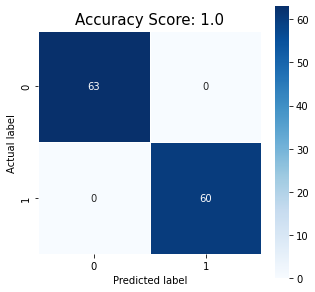

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Gradboost_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(boost.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

##### Therefore, we can see that Gradient Boosting was able to implement with a 100% Accuracy

#### E. Random Forest Implementation

In [84]:
X = malaria_df.drop(['indigenious','MONTH','WEEK'],axis=1)
X.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,78.9,1,0,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,78.9,0,1,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,78.9,0,0,0,1,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,78.9,0,0,1,0,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,76.3,1,0,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,76.3,0,0,0,1,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,73.9,0,1,0,0,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,73.9,0,0,1,0,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [86]:
y=malaria_df['indigenious']
y.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    0
Name: indigenious, dtype: uint8

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [88]:
X_train.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,0,1,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,0,1,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,0,0,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,0,1,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,0,0,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
286,80.0,0,1,0,0,87.23,79.73,73.26,72.62,285.72,6,4.43,3,4,1,1
574,80.3,0,0,0,1,87.74,80.39,74.58,73.28,50.10,1,5.04,3,2,1,0
380,76.0,0,0,1,0,86.94,79.80,71.10,71.23,42.20,2,5.90,2,7,1,0
497,67.9,0,0,1,0,99.65,90.72,84.03,78.10,0.00,0,8.45,5,0,0,0
526,80.3,0,0,0,1,86.61,80.19,74.77,73.17,312.40,8,5.86,3,7,1,0


In [89]:
y_train.head(10)

423    1
328    1
116    1
395    1
564    0
286    1
574    1
380    0
497    0
526    1
Name: indigenious, dtype: uint8

In [90]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,
                               random_state=1)

In [91]:
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [92]:
for_predictions = forest.predict(X_test)
for_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [93]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,for_predictions)
score

1.0

In [94]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_test, for_predictions, pos_label=1)
precision_negative = precision_score(y_test, for_predictions, pos_label=0)
precision_positive, precision_negative 

(1.0, 1.0)

In [95]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,for_predictions))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        60

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



Text(0.5, 1.0, 'Accuracy Score: 1.0')

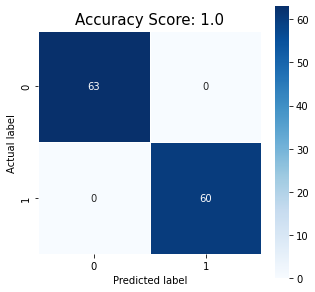

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,for_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(forest.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

##### Therefore, we have seen that Random Forest gives a 100% Accuracy

#### F. Stacking Implementation

In [97]:
X = malaria_df.drop(['indigenious','MONTH','WEEK'],axis=1)
X.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,78.9,1,0,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,78.9,0,1,0,0,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,78.9,0,0,0,1,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,78.9,0,0,1,0,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,76.3,1,0,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,76.3,0,0,0,1,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,76.3,0,1,0,0,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,73.9,0,1,0,0,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,73.9,0,0,1,0,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [98]:
y=malaria_df['indigenious']
y.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    0
Name: indigenious, dtype: uint8

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [100]:
X_train.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,0,1,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,0,1,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,0,0,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,0,1,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,0,0,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
286,80.0,0,1,0,0,87.23,79.73,73.26,72.62,285.72,6,4.43,3,4,1,1
574,80.3,0,0,0,1,87.74,80.39,74.58,73.28,50.10,1,5.04,3,2,1,0
380,76.0,0,0,1,0,86.94,79.80,71.10,71.23,42.20,2,5.90,2,7,1,0
497,67.9,0,0,1,0,99.65,90.72,84.03,78.10,0.00,0,8.45,5,0,0,0
526,80.3,0,0,0,1,86.61,80.19,74.77,73.17,312.40,8,5.86,3,7,1,0


In [101]:
y_train.head(10)

423    1
328    1
116    1
395    1
564    0
286    1
574    1
380    0
497    0
526    1
Name: indigenious, dtype: uint8

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier

In [106]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=1)
clf4 = AdaBoostClassifier(random_state=1)
clf5 = DecisionTreeClassifier(random_state=1, max_depth=None)

lr = LogisticRegression(random_state=1)

stack_clf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], meta_classifier=lr)
stack_clf.fit(X_train, y_train)

StackingClassifier(classifiers=[KNeighborsClassifier(),
                                RandomForestClassifier(random_state=1),
                                HistGradientBoostingClassifier(random_state=1),
                                AdaBoostClassifier(random_state=1),
                                DecisionTreeClassifier(random_state=1)],
                   meta_classifier=LogisticRegression(random_state=1))

In [107]:
stack_predictions = stack_clf.predict(X_test)
stack_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [108]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,stack_predictions)
score

1.0

In [109]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_test, stack_predictions, pos_label=1)
precision_negative = precision_score(y_test, stack_predictions, pos_label=0)
precision_positive, precision_negative 

(1.0, 1.0)

In [110]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,stack_predictions))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        60

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



Text(0.5, 1.0, 'Accuracy Score: 1.0')

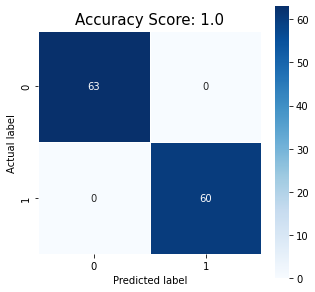

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,stack_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(stack_clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#### Therefore, we can see that Stacking has given 100% Accuracy to predict the malaria species